In [2]:
%matplotlib inline
from matplotlib.pyplot import imshow
from collections import Counter
import numpy as np
import os
from PIL import Image
import pickle
import random

In [3]:
inv_categories_dict = pickle.load(open('/barleyhome/sgutstei/Projects/opt-tfer-2/dataset_info/caltech101_dicts_all.pkl','rb'))

In [31]:
def get_stats(dataset_path):
    ims = pickle.load(open(dataset_path,'rb'))
    spc_dict = Counter(ims['fine_labels'])
    spc_tot = sum([spc_dict[x] for x in spc_dict])
    spc_list = sorted(list(set([spc_dict[x] for x in spc_dict])))
    print("spc's: ", spc_list,"\n", min(spc_list), sum(spc_list)/len(spc_list), max(spc_list), spc_tot)
    out_str = ""
    ctr=0
    for x in sorted(spc_dict):
        print ("{}:{}".format(x,spc_dict[x]),end=" -- ")
        if ctr % 10 == 9:
            print("\n")
            ctr =0
        else: 
            ctr +=1
    return 

In [32]:
get_stats("../cifar-100-python/cifar100_living_notliving/trgt_tasks_10_a/train")

spc's:  [10] 
 10 10.0 10 350
5:10 -- 8:10 -- 9:10 -- 10:10 -- 12:10 -- 13:10 -- 16:10 -- 17:10 -- 20:10 -- 22:10 -- 

23:10 -- 25:10 -- 28:10 -- 33:10 -- 37:10 -- 39:10 -- 40:10 -- 41:10 -- 48:10 -- 49:10 -- 

58:10 -- 60:10 -- 61:10 -- 68:10 -- 69:10 -- 71:10 -- 76:10 -- 81:10 -- 84:10 -- 85:10 -- 

86:10 -- 87:10 -- 89:10 -- 90:10 -- 94:10 -- 

In [33]:
get_stats("./caltech101_living_not_living/src_tasks/train")

spc's:  [28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 53, 54, 55, 56, 57, 58, 60, 64, 66, 69, 70, 71, 75, 83, 106, 166, 361, 664] 
 28 78.48648648648648 664 3530
1:361 -- 3:166 -- 6:664 -- 8:34 -- 10:44 -- 11:38 -- 13:106 -- 15:35 -- 17:75 -- 19:35 -- 

25:39 -- 26:57 -- 27:60 -- 28:58 -- 29:41 -- 30:42 -- 32:55 -- 34:53 -- 35:56 -- 37:53 -- 

38:43 -- 42:55 -- 43:37 -- 45:28 -- 48:83 -- 50:44 -- 52:66 -- 54:53 -- 55:71 -- 59:64 -- 

60:34 -- 61:54 -- 63:33 -- 67:45 -- 68:29 -- 69:32 -- 71:31 -- 72:37 -- 74:28 -- 77:48 -- 

78:40 -- 82:69 -- 83:47 -- 87:71 -- 88:48 -- 90:29 -- 91:70 -- 92:40 -- 93:71 -- 96:30 -- 

98:28 -- 

In [34]:
get_stats("./caltech101_living_not_living/trgt_tasks/train")

spc's:  [25, 26, 27, 28, 29, 32, 33, 34, 35, 37, 39, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 62, 63, 67, 68, 70, 72, 73, 81, 82, 88, 94, 102, 198, 662] 
 25 72.34210526315789 662 3269
4:662 -- 5:45 -- 7:34 -- 9:39 -- 12:27 -- 14:81 -- 16:70 -- 18:41 -- 20:102 -- 21:39 -- 

22:48 -- 23:51 -- 24:88 -- 31:47 -- 33:43 -- 36:62 -- 39:53 -- 40:70 -- 41:55 -- 44:28 -- 

46:42 -- 47:82 -- 49:34 -- 51:73 -- 53:25 -- 56:94 -- 57:50 -- 58:67 -- 62:35 -- 64:72 -- 

65:26 -- 66:63 -- 70:39 -- 73:43 -- 75:47 -- 76:68 -- 79:33 -- 80:52 -- 81:32 -- 84:29 -- 

85:53 -- 86:37 -- 89:53 -- 94:62 -- 95:198 -- 97:48 -- 99:46 -- 100:32 -- 101:49 -- 

In [36]:
get_stats("./caltech101_living_not_living/trgt_tasks_10_a/train")

spc's:  [10] 
 10 10.0 10 490
4:10 -- 5:10 -- 7:10 -- 9:10 -- 12:10 -- 14:10 -- 16:10 -- 18:10 -- 20:10 -- 21:10 -- 

22:10 -- 23:10 -- 24:10 -- 31:10 -- 33:10 -- 36:10 -- 39:10 -- 40:10 -- 41:10 -- 44:10 -- 

46:10 -- 47:10 -- 49:10 -- 51:10 -- 53:10 -- 56:10 -- 57:10 -- 58:10 -- 62:10 -- 64:10 -- 

65:10 -- 66:10 -- 70:10 -- 73:10 -- 75:10 -- 76:10 -- 79:10 -- 80:10 -- 81:10 -- 84:10 -- 

85:10 -- 86:10 -- 89:10 -- 94:10 -- 95:10 -- 97:10 -- 99:10 -- 100:10 -- 101:10 -- 

In [23]:
def show_image2(samp, data_dict):
    test_im = data_dict['data'][samp]
    zz=test_im.reshape(1,3,32,32)
    zz=zz[0,:]
    zz=zz.transpose(1,2,0)
    zz=zz.astype(int)
    im_name = inv_categories_dict[data_dict['fine_labels'][samp]]
    file_name = data_dict['filenames'][samp]
    print(im_name, file_name)
    imshow(zz)

In [57]:
os.listdir('../cifar-100-python')
train_ims = pickle.load(open("../cifar-100-python/cifar100_living_notliving/trgt_tasks_10_a/train",'rb'))

In [58]:
spc_dict = Counter(train_ims['fine_labels'])
spc_set = set([spc_dict[x] for x in spc_dict])
spc_set

{10}

In [69]:
train_ims = pickle.load(open("./caltech101_living_not_living/src_tasks/train",'rb'))

In [70]:
spc = Counter(train_ims['fine_labels'])
for x in sorted(spc):
    print (x,spc[x])

1 361
3 166
6 664
8 34
10 44
11 38
13 106
15 35
17 75
19 35
25 39
26 57
27 60
28 58
29 41
30 42
32 55
34 53
35 56
37 53
38 43
42 55
43 37
45 28
48 83
50 44
52 66
54 53
55 71
59 64
60 34
61 54
63 33
67 45
68 29
69 32
71 31
72 37
74 28
77 48
78 40
82 69
83 47
87 71
88 48
90 29
91 70
92 40
93 71
96 30
98 28


lamp lamp_image_0017.jpg


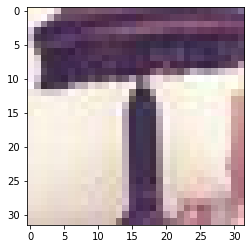

In [32]:
show_image2(40,train_ims)

In [31]:
vv=train_ims['data'][0]
vv.min()

87.0

In [33]:
train_ims = pickle.load(open("./caltech101_living_not_living/src_tasks/train",'rb'))

sunflower sunflower_image_0029.jpg


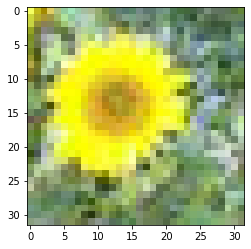

In [36]:
show_image2(500,train_ims)

In [37]:
os.getcwd()

'/mnt/growler/barleyhome/sgutstei/.keras/datasets/caltech-101'